# **Tugas 1**

* Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

### **Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


### **Load Data**

In [2]:
# Muat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


### **Normalisasi Data**

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Definisikan model CNN dengan batch normalization 
model = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(10)
])

c:\Users\sukma bagus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compile Model CNN**

In [ ]:
# Kompilasi model
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

### **Data Augmentation/Augmentasi**

In [6]:
# Data augmentation
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

### **Fit Model**

In [7]:
# Latih model dengan data augmentation dan epoch 10
history = model.fit(data_augmentation.flow(train_images, train_labels, batch_size=64),
                    epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15


c:\Users\sukma bagus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
782/782 ━━━━━━━━━━━━━━━━━━━━ 174s 217ms/step - accuracy: 0.3981 - loss: 1.8207 - val_accuracy: 0.5894 - val_loss: 1.2180
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.6242 - loss: 1.0599 - val_accuracy: 0.6548 - val_loss: 0.9791
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.6844 - loss: 0.8946 - val_accuracy: 0.5712 - val_loss: 1.4515
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.7167 - loss: 0.8069 - val_accuracy: 0.7283 - val_loss: 0.8057
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.7480 - loss: 0.7262 - val_accuracy: 0.7607 - val_loss: 0.7088
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 215ms/step - accuracy: 0.7678 - loss: 0.6690 - val_accuracy: 0.7588 - val_loss: 0.7060
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 214ms/step - accuracy: 0.7796 - loss: 0.6359 - val_accuracy: 0.7434 - val_loss: 0.7590
Epoch 8/15
782/782 ━━

### **Evaluasi Model**

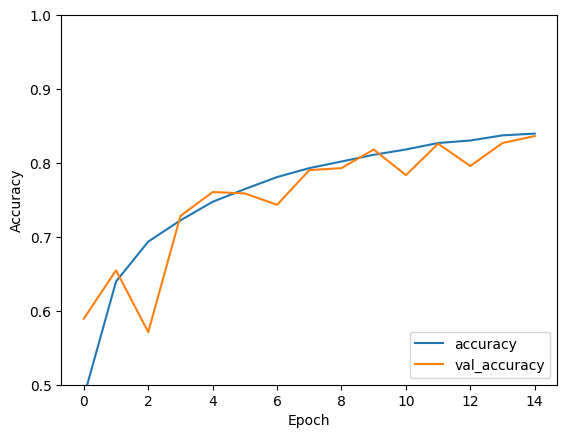

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


Untuk mendapatkan hasil akurasi diatas 80%, pada modifikasi kode di praktikum 2 sebelumnya saya melakukan model klasifikasi gambar yang memanfaatkan batch normalization untuk meningkatkan stabilitas model, augmentasi data untuk menigkatkan generalisasi model, serta teknik regulasi seperti dropout untuk mencegah overfitting pada model, sehingga menghasilkan akurasi yaitu 83%.

In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 5s - 16ms/step - accuracy: 0.8364 - loss: 0.4879
0.8363999724388123
